In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy.stats import ttest_ind

# To display up to 100 columns
pd.set_option('display.max_columns', 100)
# To display up to 100 rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Read and explore data

In [2]:
df = pd.read_csv('/Users/adamszpilewicz/Documents/languages/python/home_assignment/data/BCV data science take home_data set.csv')
df.head()

,UUID,NAME,TYPE,PERMALINK,CB_URL,RANK,CREATED_AT,UPDATED_AT,LEGAL_NAME,ROLES,DOMAIN,HOMEPAGE_URL,COUNTRY_CODE,STATE_CODE,REGION,CITY,ADDRESS,POSTAL_CODE,STATUS,SHORT_DESCRIPTION,CATEGORY_LIST,CATEGORY_GROUPS_LIST,NUM_FUNDING_ROUNDS,TOTAL_FUNDING_USD,TOTAL_FUNDING,TOTAL_FUNDING_CURRENCY_CODE,FOUNDED_ON,LAST_FUNDING_ON,CLOSED_ON,EMPLOYEE_COUNT,EMAIL,PHONE,FACEBOOK_URL,LINKEDIN_URL,TWITTER_URL,LOGO_URL,ALIAS1,ALIAS2,ALIAS3,PRIMARY_ROLE,NUM_EXISTS,UUID.1,NAME.1,TYPE.1,PERMALINK.1,CB_URL.1,RANK.1,CREATED_AT.1,UPDATED_AT.1,COUNTRY_CODE.1,STATE_CODE.1,REGION.1,CITY.1,INVESTMENT_TYPE,ANNOUNCED_ON,RAISED_AMOUNT_USD,RAISED_AMOUNT,RAISED_AMOUNT_CURRENCY_CODE,POST_MONEY_VALUATION_USD,POST_MONEY_VALUATION,POST_MONEY_VALUATION_CURRENCY_CODE,INVESTOR_COUNT,ORG_UUID,ORG_NAME,LEAD_INVESTOR_UUIDS
0,2d98c4d0-adab-6261-c07e-c92f04b0e4b2,Zello,organization,loudtalks,https://www.crunchbase.com/organization/loudtalks,11655.0,2007-09-08T00:45:42Z,2023-06-19T18:32:27Z,Zello Inc.,company,zello.com,https://zello.com/,USA,TX,Texas,Austin,1717 W 6th Suite 450,78703,operating,Frontline workers save the world everyday. We ...,"Apps,Communities,Enterprise Software,Internet,...","Apps,Community and Lifestyle,Information Techn...",3,20750000,20750000,USD,2011-12-14,2022-06-08,NaN,51-100,info@zello.com,(512) 580-4675,https://www.facebook.com/ZelloMe/,https://www.linkedin.com/company/2478568/,http://twitter.com/Zello,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,454e8a0b-7793-41d1-8d33-f2117c70d01d,Series A - Zello,funding_round,loudtalks-series-a--454e8a0b,https://www.crunchbase.com/funding_round/loudt...,330832.0,2022-06-09T06:04:58Z,2022-06-09T06:15:49Z,USA,TX,Texas,Austin,series_a,2022-06-08,20000000.0,20000000.0,USD,NaN,NaN,NaN,2.0,2d98c4d0-adab-6261-c07e-c92f04b0e4b2,Zello,"9d4a3980-c2f7-7611-da40-02483d0dbcc1,313b076c-..."
1,e2eb882f-8a3c-82b6-166f-090316f48972,Aptera,organization,aptera,https://www.crunchbase.com/organization/aptera,6246.0,2008-05-28T11:32:49Z,2023-05-16T09:13:04Z,Aptera Motors Corp.,company,aptera.us,http://www.aptera.us,USA,CA,California,Carlsbad,2778 Loker Ave W,92010,operating,"Aptera Motors is engaged in designing, enginee...","Automotive,Manufacturing,Service Industry","Manufacturing,Other,Transportation",9,100850000,100850000,USD,2006-01-01,2022-06-06,NaN,51-100,info@Aptera.us,(858) 371-3151,https://www.facebook.com/ApteraMotors3.0,https://www.linkedin.com/company/apteramotors,https://twitter.com/aptera_motors,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,984266a1-4a2a-4a2f-adba-6ca3b52e954c,Series A - Aptera,funding_round,aptera-series-a--984266a1,https://www.crunchbase.com/funding_round/apter...,552977.0,2021-03-02T07:34:25Z,2021-03-02T07:34:25Z,USA,CA,California,Carlsbad,series_a,2021-02-19,4000000.0,4000000.0,USD,NaN,NaN,NaN,2.0,e2eb882f-8a3c-82b6-166f-090316f48972,Aptera,c51ea9e6-f4e2-4e34-bf35-f08edfab6898
2,d0710c30-f3d6-c119-7c8d-85cec4134e09,Fixie,organization,fixie,https://www.crunchbase.com/organization/fixie,24852.0,2008-07-10T13:53:49Z,2022-03-17T17:51:08Z,NaN,company,fixieconsulting.com,http://www.fixieconsulting.com,USA,WA,Washington,Seattle,1008 Western Ave Suite 400,98104,closed,We are a small agile web development team base...,"Consulting,Software,Web Design,Web Development","Design,Professional Services,Software",1,17000000,17000000,USD,2007-08-01,2023-04-03,NaN,11-50,info@fixieconsulting.com,NaN,NaN,NaN,NaN,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,e63c7b70-d543-4294-8018-5c72b0b5d24d,Seed Round - Fixie,funding_round,fixie-seed--e63c7b70,https://www.crunchbase.com/funding_round/fixie...,10024.0,2023-04-05T10:38:14Z,2023-04-05T10:38:14Z,USA,WA,Washington,Seattle,seed,2023-04-03,17000000.0,17000000.0,USD,NaN,NaN,NaN,6.0,d0710c30-f3d6-c119-7c8d-85cec4134e09,Fixie,d29973c3-95ec-691d-defd-6a6ba713c72a
3,051db092-1e48-1d89-4afc-9e5c94b543c9,Conductor,organization,conductor,https://www.crunchbase.com/organization/conductor,2705.0,2

In [8]:
df.describe()

,RANK,NUM_FUNDING_ROUNDS,TOTAL_FUNDING_USD,TOTAL_FUNDING,NUM_EXISTS,RANK.1,RAISED_AMOUNT_USD,RAISED_AMOUNT,POST_MONEY_VALUATION_USD,POST_MONEY_VALUATION,INVESTOR_COUNT
count,22277.00,22301.00,22301.00,22301.00,56.00,22194.00,17271.00,17271.00,1691.00,1691.00,17893.00
mean,76906.85,3.17,27058606.38,33091748.21,4.68,215774.81,14540127.33,33211533.27,204537630.24,895878980.72,4.24
std,159629.61,2.32,132465331.90,269548673.82,8.20,182708.00,43620079.91,733298553.78,804378943.42,28458482283.35,4.41
min,8.00,1.00,0.00,0.00,1.00,4.00,1000.00,1000.00,51500.00,51500.00,0.00
25%,14649.00,2.00,1392813.00,1400000.00,1.00,63327.50,1500000.00,1557259.00,8200000.00,8200000.00,1.00
50%,35438.00,3.00,6150000.00,6200000.00,2.00,141382.50,5000000.00,5000000.00,20250000.00,20250000.00,3.00
75%,79358.00,4.00,22600000.00,23000000.00,3.00,372499.50,15000000.00,15000000.00,100000000.00,100000000.00,6.00
max,2931814.00,37.00,11303370000.00,21000000000.00,47.00,595416.00,3000000000.00,73000000000.00,25000000000.00,1170000000000.00,97.00


In [65]:
df[df["NAME"]=="UpHonest Capital"]

,UUID,NAME,TYPE,PERMALINK,CB_URL,RANK,CREATED_AT,UPDATED_AT,LEGAL_NAME,ROLES,DOMAIN,HOMEPAGE_URL,COUNTRY_CODE,STATE_CODE,REGION,CITY,ADDRESS,POSTAL_CODE,STATUS,SHORT_DESCRIPTION,CATEGORY_LIST,CATEGORY_GROUPS_LIST,NUM_FUNDING_ROUNDS,TOTAL_FUNDING_USD,TOTAL_FUNDING,TOTAL_FUNDING_CURRENCY_CODE,FOUNDED_ON,LAST_FUNDING_ON,CLOSED_ON,EMPLOYEE_COUNT,EMAIL,PHONE,FACEBOOK_URL,LINKEDIN_URL,TWITTER_URL,LOGO_URL,ALIAS1,ALIAS2,ALIAS3,PRIMARY_ROLE,NUM_EXISTS,UUID.1,NAME.1,TYPE.1,PERMALINK.1,CB_URL.1,RANK.1,CREATED_AT.1,UPDATED_AT.1,COUNTRY_CODE.1,STATE_CODE.1,REGION.1,CITY.1,INVESTMENT_TYPE,ANNOUNCED_ON,RAISED_AMOUNT_USD,RAISED_AMOUNT,RAISED_AMOUNT_CURRENCY_CODE,POST_MONEY_VALUATION_USD,POST_MONEY_VALUATION,POST_MONEY_VALUATION_CURRENCY_CODE,INVESTOR_COUNT,ORG_UUID,ORG_NAME,LEAD_INVESTOR_UUIDS,YEAR_MONTH
15797,40e3b902-7127-3d71-b67b-ec4a2207afe3,UpHonest Capital,organization,uphonest-capital,https://www.crunchbase.com/organization/uphone...,3782.00,2017-01-11T00:24:38Z,2023-08-29T12:05:25Z,"UPHONEST CAPITAL, L.P.","investor,company",uphonestcapital.com,https://www.uphonestcapital.com,USA,CA,California,Santa Clara,3120 Scott Blvd,95054,operating,"UpHonest Capital is an early-stage, industry-a...","Business Development,Finance,Financial Service...","Financial Services,Lending and Investments,Pro...",1,1000,1000,USD,2015-01-01,2023-08-24,NaN,11-50,info@uphonestcapital.com,NaN,NaN,https://www.linkedin.com/company/uphonest-capital,https://twitter.com/uphonestcapital,https://images.crunchbase.com/image/upload/t_c...,威诚资本,Weicheng Ziben,NaN,investor,23.00,60fac231-f6bc-46d9-af98-d29e0f17c3ab,Seed Round - UpHonest Capital,funding_round,uphonest-capital-seed--60fac231,https://www.crunchbase.com/funding_round/uphon...,7107.00,2023-08-28T06:28:14Z,2023-08-28T06:28:14Z,USA,CA,California,Santa Clara,seed,2023-08-24,1000.00,1000.00,USD,NaN,NaN,NaN,NaN,40e3b902-7127-3d71-b67b-ec4a2207afe3,UpHonest Capital,NaN,2023-08


# Exploratory Data Analysis (EDA)

## Identify and Visualize Top Sectors Receiving Most Investments

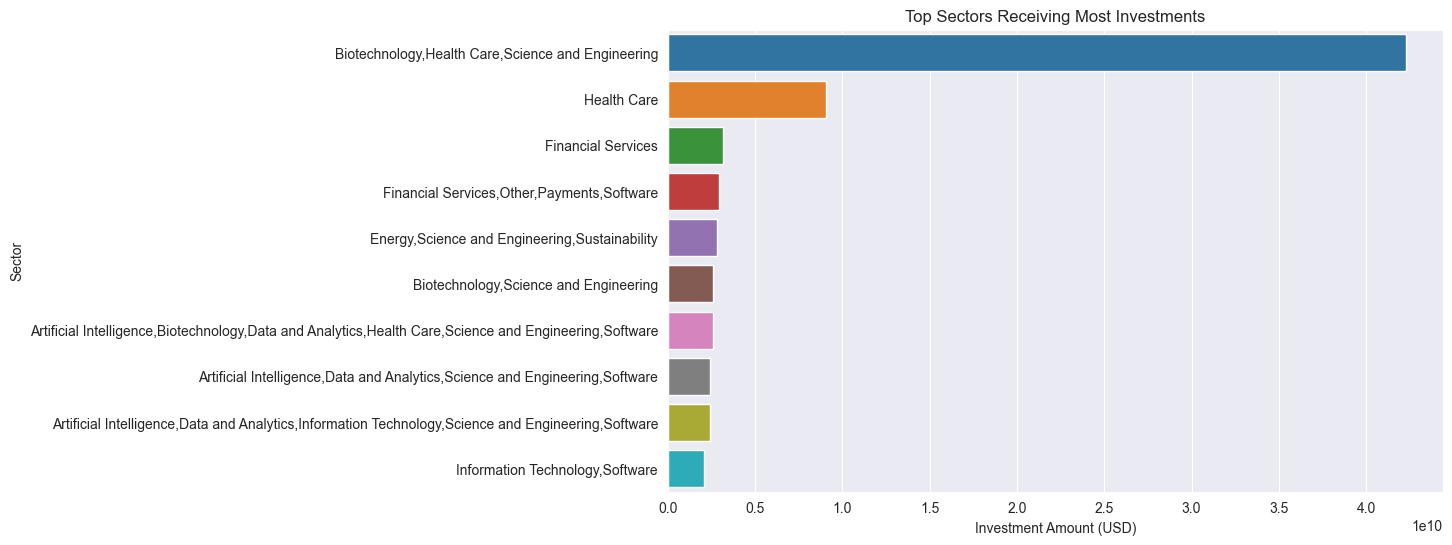

In [11]:
# Assuming 'CATEGORY_GROUPS_LIST' as sectors, and 'RAISED_AMOUNT_USD' as Investment amounts.
sector_investments = df.groupby('CATEGORY_GROUPS_LIST')['RAISED_AMOUNT_USD'].sum().reset_index()

top_sectors = sector_investments.sort_values(by='RAISED_AMOUNT_USD', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='RAISED_AMOUNT_USD', y='CATEGORY_GROUPS_LIST', data=top_sectors)
plt.title('Top Sectors Receiving Most Investments')
plt.xlabel('Investment Amount (USD)')
plt.ylabel('Sector')
plt.show()


## Compare the geographic distribution of startups in H1 ‘23 vs. in H1 ‘22.

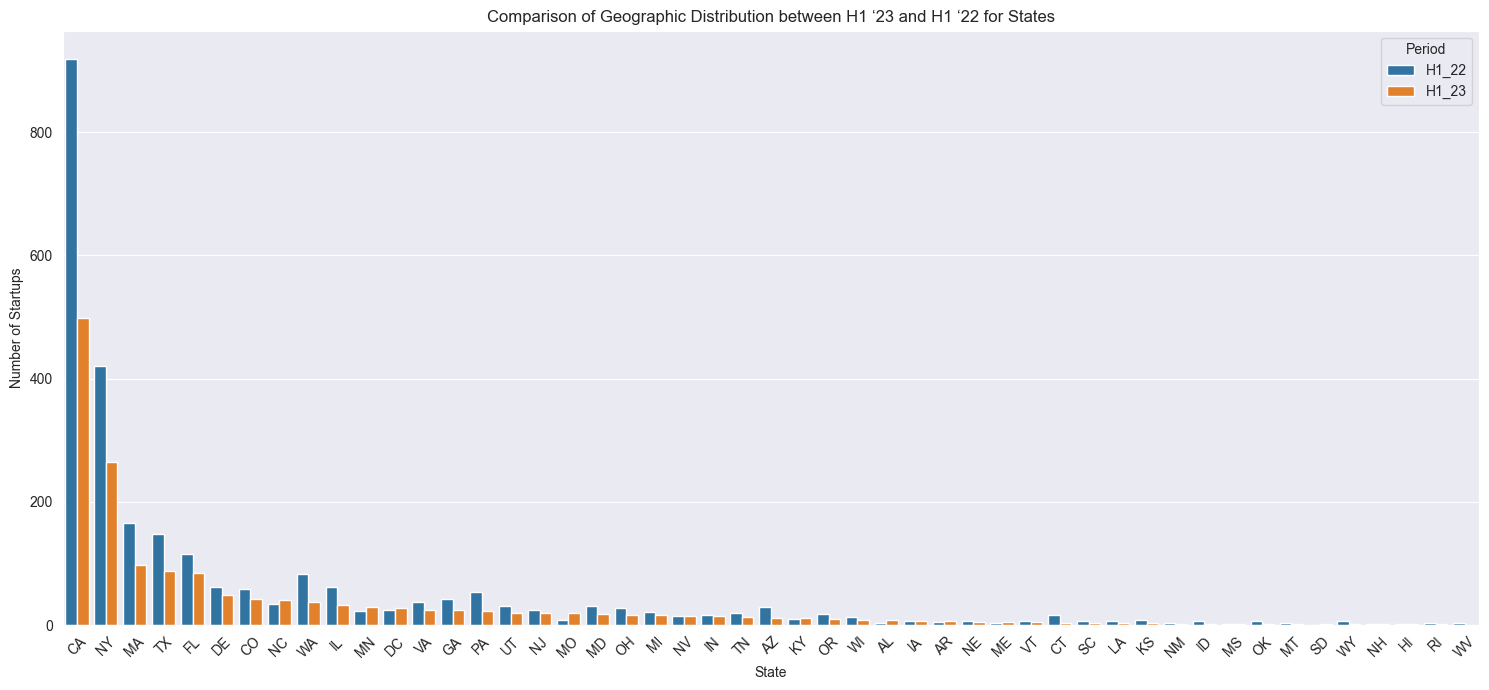

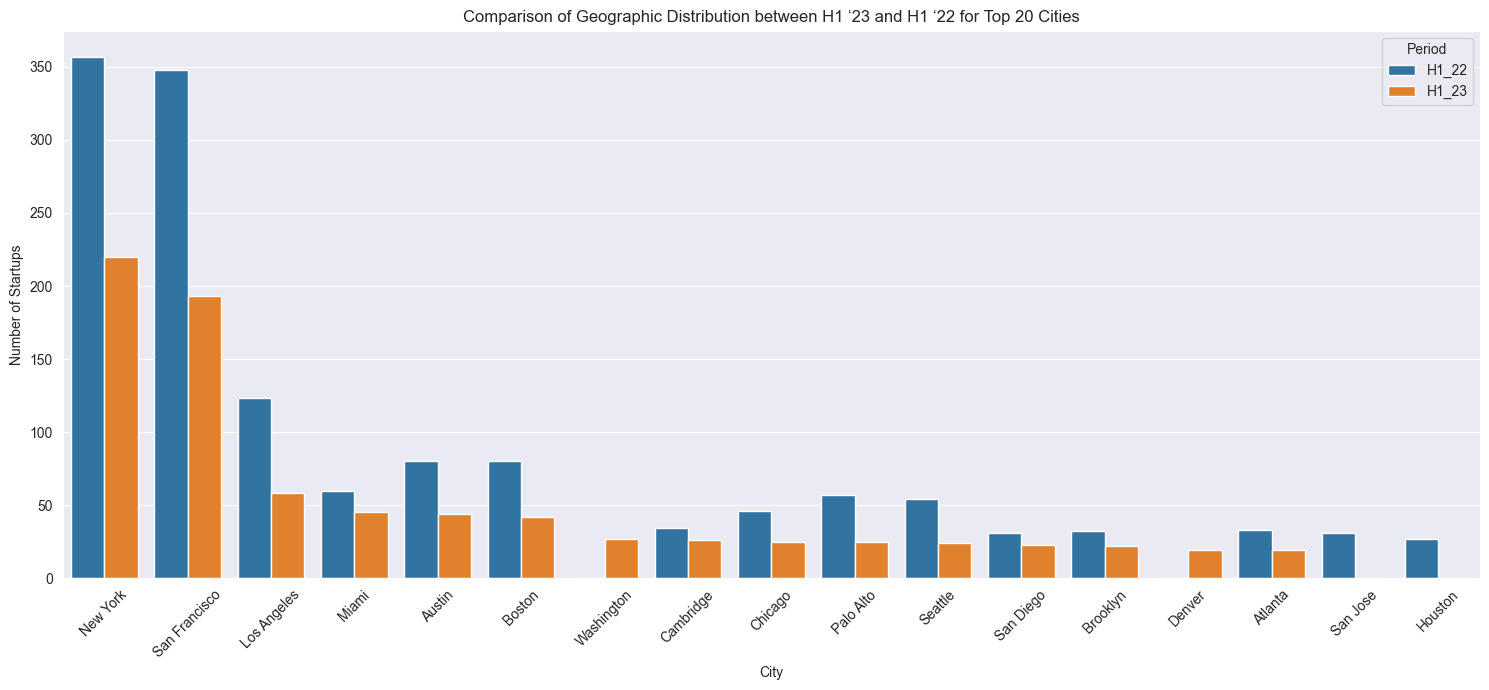

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrames for the two periods
h1_23 = df[(df['ANNOUNCED_ON'] >= '2023-01-01') & (df['ANNOUNCED_ON'] <= '2023-03-31')]
h1_22 = df[(df['ANNOUNCED_ON'] >= '2022-01-01') & (df['ANNOUNCED_ON'] <= '2022-03-31')]

# For states
state_dist_23 = h1_23['STATE_CODE'].value_counts().reset_index().rename(columns={'STATE_CODE': 'State', 'count': 'H1_23'})
state_dist_22 = h1_22['STATE_CODE'].value_counts().reset_index().rename(columns={'STATE_CODE': 'State', 'count': 'H1_22'})

merged_state_dist = pd.merge(state_dist_23, state_dist_22, on='State', how='outer')
merged_state_dist.fillna(0, inplace=True)

melted_state_df = merged_state_dist.melt(id_vars='State', var_name='Period', value_name='Count')

plt.figure(figsize=(15,7))
sns.barplot(x='State', y='Count', hue='Period', data=melted_state_df, hue_order=['H1_22', 'H1_23'], ci=None)
plt.title('Comparison of Geographic Distribution between H1 ‘23 and H1 ‘22 for States')
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# For Cities
city_dist_23 = h1_23['CITY'].value_counts().reset_index().rename(columns={'CITY': 'City', 'count': 'H1_23'})
city_dist_22 = h1_22['CITY'].value_counts().reset_index().rename(columns={'CITY': 'City', 'count': 'H1_22'})

merged_city_dist = pd.merge(city_dist_23.head(15), city_dist_22.head(15), on='City', how='outer')
merged_city_dist.fillna(0, inplace=True)

melted_city_df = merged_city_dist.melt(id_vars='City', var_name='Period', value_name='Count')

plt.figure(figsize=(15,7))
sns.barplot(x='City', y='Count', hue='Period', data=melted_city_df, hue_order=['H1_22', 'H1_23'], ci=None)
plt.title('Comparison of Geographic Distribution between H1 ‘23 and H1 ‘22 for Top 20 Cities')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identify the Top 5% of the Investors by count

In [36]:
# Grouping by 'NAME' and calculating the sum for 'INVESTOR_COUNT' and 'RAISED_AMOUNT_USD'
investor_counts_and_raised_sum = df.groupby('NAME')[['INVESTOR_COUNT', 'RAISED_AMOUNT_USD']].sum().reset_index()

# Sorting the DataFrame by 'INVESTOR_COUNT' in descending order
investor_counts_and_raised_sum = investor_counts_and_raised_sum.sort_values(by='INVESTOR_COUNT', ascending=False)

# Filtering the top 5% of investors
top_investors = investor_counts_and_raised_sum.head(int(0.05 * len(investor_counts_and_raised_sum)))

top_investors

,NAME,INVESTOR_COUNT,RAISED_AMOUNT_USD
14183,Syndicate,185.00,21800000.00
16357,XMTP,115.00,25000000.00
9223,MoonPay,102.00,642000000.00
1164,Arta Finance,84.00,90000000.00
56,3Box,83.00,30000000.00
...,...,...,...
2771,CatalyzeX,15.00,1640000.00
9416,NFTify,15.00,2100000.00
12634,Safely You,15.00,59500000.00
8800,Mediar Therapeutics,15.00,85000000.00


## Identify the Top 5% of the Investors by sum

In [37]:
# Grouping by 'NAME' and calculating the sum for 'INVESTOR_COUNT' and 'RAISED_AMOUNT_USD'
investor_counts_and_raised_sum = df.groupby('NAME')[['INVESTOR_COUNT', 'RAISED_AMOUNT_USD']].sum().reset_index()

# Sorting the DataFrame by 'INVESTOR_COUNT' in descending order
investor_counts_and_raised_sum = investor_counts_and_raised_sum.sort_values(by='RAISED_AMOUNT_USD', ascending=False)

# Filtering the top 5% of investors
top_investors = investor_counts_and_raised_sum.head(int(0.05 * len(investor_counts_and_raised_sum)))

top_investors

,NAME,INVESTOR_COUNT,RAISED_AMOUNT_USD
747,Altos Labs,1.00,3000000000.00
3326,Commonwealth Fusion,31.00,1800000000.00
1169,Articulate,3.00,1500000000.00
13111,Sierra Space,5.00,1400000000.00
14493,TeraWatt Infrastructure,6.00,1100000000.00
...,...,...,...
10519,PROOF,8.00,60000000.00
7836,Kula Bio,21.00,60000000.00
7558,Kandji,12.00,60000000.00
169,AKASA,3.00,60000000.00


## Which category is the best to invest in?

In [44]:
# Filter for operating companies
operating_companies = df[df['STATUS'] == 'operating']

# Drop rows with NaN in 'CATEGORY_LIST', 'NUM_FUNDING_ROUNDS', and 'TOTAL_FUNDING_USD'
operating_companies = operating_companies.dropna(subset=['CATEGORY_LIST', 'NUM_FUNDING_ROUNDS', 'TOTAL_FUNDING_USD'])

# Create a new DataFrame to hold aggregated values
category_aggregate = operating_companies.groupby('CATEGORY_LIST').agg(
    total_funding=pd.NamedAgg(column='TOTAL_FUNDING_USD', aggfunc='sum'),
    num_funding_rounds=pd.NamedAgg(column='NUM_FUNDING_ROUNDS', aggfunc='sum'),
    average_funding=pd.NamedAgg(column='TOTAL_FUNDING_USD', aggfunc='mean'),
    company_count=pd.NamedAgg(column='UUID', aggfunc='count')
).reset_index()

# Sort the DataFrame based on total_funding and num_funding_rounds
category_aggregate = category_aggregate.sort_values(by=['total_funding', 'num_funding_rounds'], ascending=[False, False])

# Display the top category to invest in
category_aggregate.head(10)

,CATEGORY_LIST,total_funding,num_funding_rounds,average_funding,company_count
3292,"Artificial Intelligence,Machine Learning,Natur...",22608140000,20,7536046666.67,3
5957,"Cloud Computing,Cloud Infrastructure,Informati...",5753000000,14,2876500000.00,2
4706,"Biotechnology,Health Care,Therapeutics",4513006982,236,58610480.29,77
4637,"Biotechnology,Health Care,Life Science",4358348462,180,82232989.85,53
4698,"Biotechnology,Health Care,Pharmaceutical,Thera...",4297571229,106,186850923.00,23
4639,"Biotechnology,Health Care,Life Science,Medical",3855948209,67,154237928.36,25
4663,"Biotechnology,Health Care,Medical",3445076009,297,46555081.20,74
4777,"Biotechnology,Medical,Therapeutics",3311258523,87,100341167.36,33
9405,"Finance,Financial Services,FinTech",3302735131,193,62315757.19,53
3187,"Artificial Intelligence,Information Technology...",3256237981,30,296021634.64,11


## Feature Correlation Map

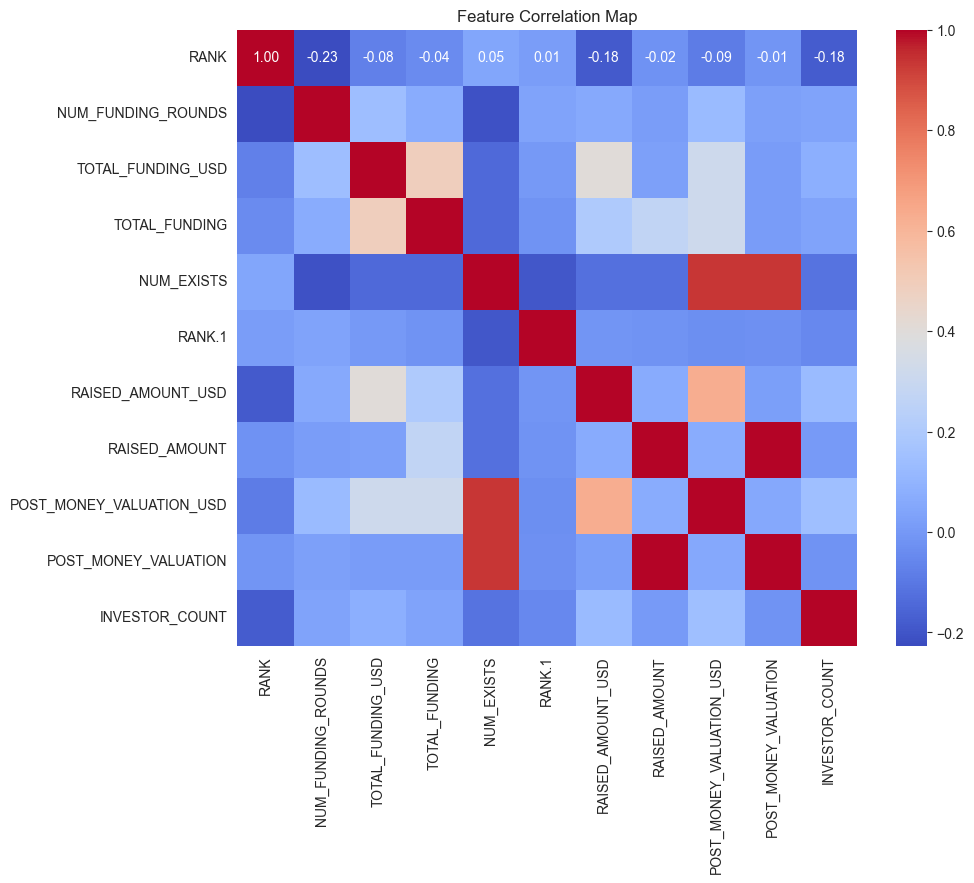

In [48]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Map')
plt.show()

# Statistical Analysis / Machine Learning: (Use appropriate statistical tests.)

## Test the hypothesis: "Startups in the Fintech sector tend to receive more funding than others.”

T-statistic: 0.3432040254093213
P-value: 0.7330217061460966
Fail to Reject the Null Hypothesis: There is no significant difference in funding


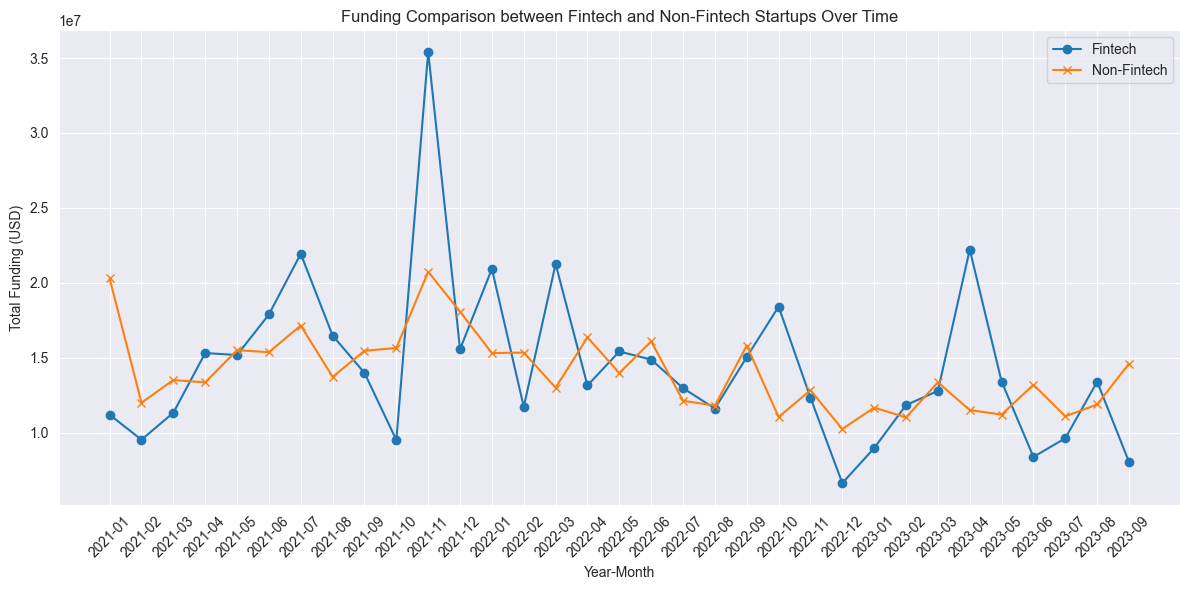

In [57]:
# Convert the 'ANNOUNCED_ON' column to datetime, if not already
df['ANNOUNCED_ON'] = pd.to_datetime(df['ANNOUNCED_ON'])

# Extracting Year and Month to group by
df['YEAR_MONTH'] = df['ANNOUNCED_ON'].dt.to_period('M')

# Filtering DataFrames
fintech = df[df['CATEGORY_LIST'].str.contains('FinTech', na=False)]
non_fintech = df[~df['CATEGORY_LIST'].str.contains('FinTech', na=False)]

# Group by 'YEAR_MONTH' and summing 'RAISED_AMOUNT_USD'
fintech_grouped = fintech.groupby('YEAR_MONTH')['RAISED_AMOUNT_USD'].mean().dropna()
non_fintech_grouped = non_fintech.groupby('YEAR_MONTH')['RAISED_AMOUNT_USD'].mean().dropna()

# Performing the t-test on grouped data
t_stat, p_value = ttest_ind(fintech_grouped, non_fintech_grouped, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: There is a significant difference in funding between Fintech and non-Fintech startups.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference in funding")


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(fintech_grouped.index.astype(str), fintech_grouped.values, label='Fintech', marker='o')
plt.plot(non_fintech_grouped.index.astype(str), non_fintech_grouped.values, label='Non-Fintech', marker='x')
plt.xticks(rotation=45)
plt.title('Funding Comparison between Fintech and Non-Fintech Startups Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Funding (USD)')
plt.legend()
plt.tight_layout()
plt.show()

## Can you identify seasonality or trends in the investment data, i.e., are there certain times of the year when startups tend to raise more?

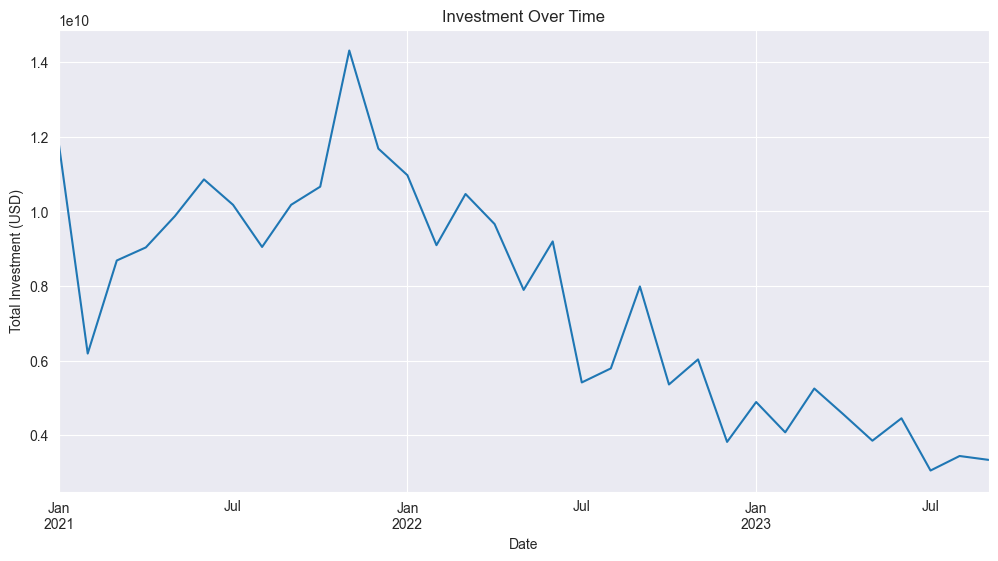

In [58]:
# Assuming 'ANNOUNCED_ON' is the date of investment and 'RAISED_AMOUNT_USD' is the amount of investment.
# Convert 'ANNOUNCED_ON' to datetime if it's not already
df['ANNOUNCED_ON'] = pd.to_datetime(df['ANNOUNCED_ON'])

# Drop NA values in 'RAISED_AMOUNT_USD' for analysis
df.dropna(subset=['RAISED_AMOUNT_USD'], inplace=True)

# Resampling the data on a monthly basis
monthly_investments = df.resample('M', on='ANNOUNCED_ON')['RAISED_AMOUNT_USD'].sum()

# Plotting
plt.figure(figsize=(12,6))
monthly_investments.plot()
plt.title('Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Total Investment (USD)')
plt.show()
